# Explore here

In [3]:
# Your code here

import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [4]:
df_listo=df[["MedInc","Latitude","Longitude"]]
df_listo.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test=train_test_split(df_listo,test_size=0.2,random_state=42)


In [6]:
from sklearn.cluster import KMeans

model_k=KMeans(n_clusters=6,n_init="auto",random_state=42)
model_k.fit(X_train)


,n_clusters,6
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [7]:
model_k.labels_

array([3, 1, 1, ..., 3, 0, 5], shape=(16512,), dtype=int32)

In [8]:
y_train=list(model_k.labels_)
X_train["clusters"]=y_train
X_train.head()

,MedInc,Latitude,Longitude,clusters
14196,3.2596,32.71,-117.03,3
8267,3.8125,33.77,-118.16,1
17445,4.1563,34.66,-120.48,1
14265,1.9425,32.69,-117.11,3
2271,3.5542,36.78,-119.80,5


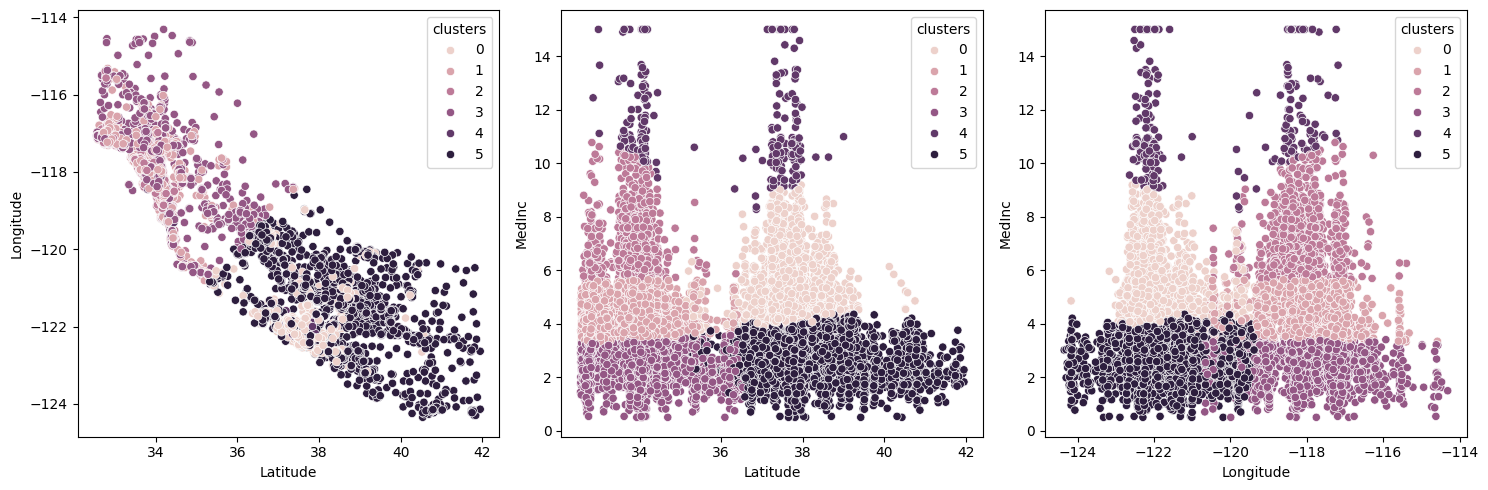

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
fig,axis=plt.subplots(1,3,figsize=(15,5))
sns.scatterplot(ax=axis[0],data=X_train,x="Latitude",y="Longitude",hue="clusters")
sns.scatterplot(ax=axis[1],data=X_train,x="Latitude",y="MedInc",hue="clusters")
sns.scatterplot(ax=axis[2],data=X_train,x="Longitude",y="MedInc",hue="clusters")

plt.tight_layout()
plt.show()

In [10]:
y_test=list(model_k.predict(X_test))
X_test["clusters"]=y_test
X_test.head()




,MedInc,Latitude,Longitude,clusters
20046,1.6812,36.06,-119.01,3
3024,2.5313,35.14,-119.46,3
15663,3.4801,37.80,-122.44,5
20484,5.7376,34.28,-118.72,2
9814,3.7250,36.62,-121.93,5


<Axes: xlabel='Longitude', ylabel='MedInc'>

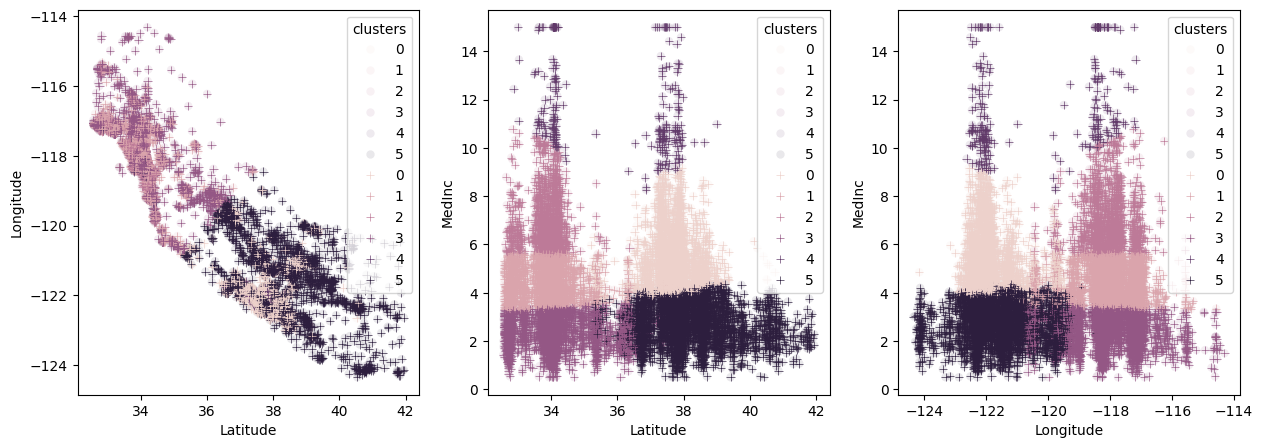

In [11]:
fig,axis=plt.subplots(1,3,figsize=(15,5))
sns.scatterplot(ax=axis[0],data=X_train,x="Latitude",y="Longitude",hue="clusters",alpha=0.1)
sns.scatterplot(ax=axis[1],data=X_train,x="Latitude",y="MedInc",hue="clusters",alpha=0.1)
sns.scatterplot(ax=axis[2],data=X_train,x="Longitude",y="MedInc",hue="clusters",alpha=0.1)

sns.scatterplot(ax=axis[0],data=X_train,x="Latitude",y="Longitude",hue="clusters",marker="+")
sns.scatterplot(ax=axis[1],data=X_train,x="Latitude",y="MedInc",hue="clusters",marker="+")
sns.scatterplot(ax=axis[2],data=X_train,x="Longitude",y="MedInc",hue="clusters",marker="+")

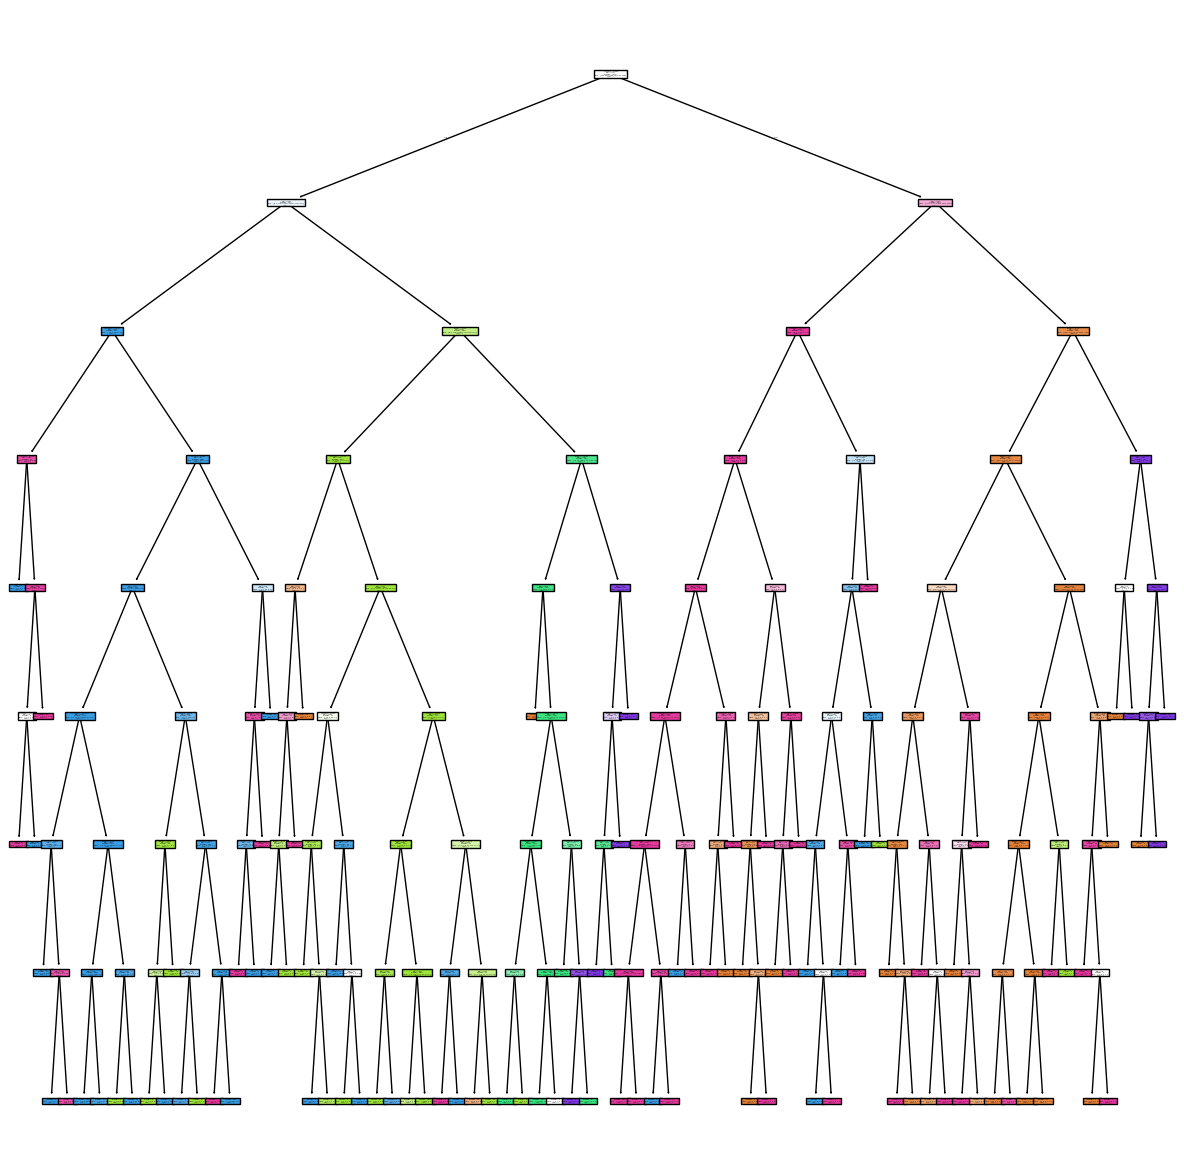

In [18]:
#para intentar explicar el modelo, debemos apoyarnos con los arboles de desiciones 
from sklearn.tree import DecisionTreeClassifier
tree_model=DecisionTreeClassifier(random_state=42,max_depth=8)
tree_model.fit(X_train[["Latitude","Longitude","MedInc"]],y_train)
from sklearn import tree
plt.figure(figsize=((15,15)))
tree.plot_tree(tree_model,filled=True,feature_names=["Latitude","Longitude","MedInc"],class_names=[str(i)for i in range(6)])
plt.show()

In [19]:
y_pred=tree_model.predict(X_test[["Latitude","Longitude","MedInc"]])
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("accuracy: "+str(accuracy))

accuracy: 0.9939437984496124


In [20]:
from pickle import dump
dump(model_k,open("../models/kmeans_model.pkl","wb"))
dump(tree_model,open("../models/decision_trees.pkl","wb"))


In [ ]:
#finalmente el arbol de desiciones ayuda a poder comprender los criterios que toma en cuenta el modelo para generar cada uno de los clusters.